### Using K-Means in Scikit-Learn

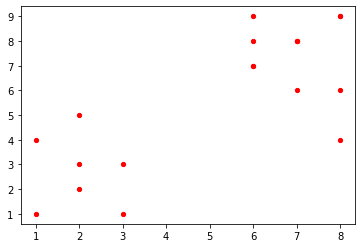

In [1]:
# load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("kmeans.csv")
plt.scatter(df['x'],df['y'], c='r', s=18)
# scaling not needed since x and y are in same range
# take note of the points that are close to each other (clusters)

In [2]:
#---create a 2D array containing all points---
X = np.array(list(zip(df['x'],df['y'])))

# build the model
from sklearn.cluster import KMeans
# define num of clusters to define
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X) # train the model

In [3]:
# use model to find the groups for each point and centroids
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)
# show the model's identifying the clusters in the predictions (mathematically)

[0 0 0 0 0 2 2 2 1 2 0 2 2 2 2 0 1 1 2]
[[2.         2.71428571]
 [7.66666667 5.33333333]
 [6.77777778 8.11111111]]


In [4]:
# replot the cases w/ labels
c = ['b', 'r', 'g']
colors = []
for i in labels: # predictions for X
    colors.append(c[i]) # assign colors for each prediction cluster (by index)
print(colors)

['b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'r', 'g', 'b', 'g', 'g', 'g', 'g', 'b', 'r', 'r', 'g']


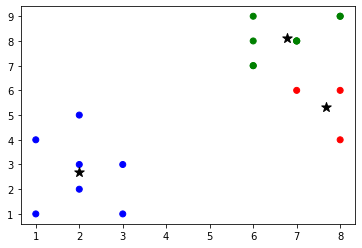

In [5]:
# create scatter plot w/ the predictions
# visual representation of the model's clusters
plt.scatter(df['x'],df['y'], c=colors)

# plot the three centroids of each cluster w/ *
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
plt.show()

In [6]:
# making predictions - example
# which cluster would this prediction belong to?
cluster = kmeans.predict([[3,4]])
print(cluster)

[0]


### Finding Optimal K
1. Elbow method
2. Silhouette coefficient

#### The Elbow Method
1. create a list to hold the Sum of Square Error (SSE)
2. determine which is the sum of the squared differences btwn each observation and its group's mean

In [7]:
# calculation
sse = [] 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
print(sse)

C:\Users\mcken\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[258.6315789473684, 50.345238095238095, 31.206349206349206, 21.57777777777778, 15.321428571428571, 12.749999999999998, 9.404761904761905, 6.833333333333334, 5.0, 3.333333333333333]


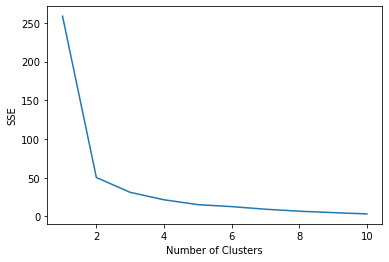

In [8]:
# visualization
plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# which number has the elbow (optimal k)?

In [9]:
# can numerically find the elbow
import kneed

ks = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
ks.elbow

2

#### The Silhoette Coefficient
- *Silhouette coef.*: measures cluster cohesion and separation (space btwn clusters)
    - 1 - a / b
    - **a** = avg distance of a point to all other points in the **same cluster**; *smaller a is ideal -> points are close together*
    - **b** = lowest avg distance of points to all other points in the **closest cluster** (another cluster); *larger b is ideal -> good separation btwn the clusters*

#### Example: Manually calculate
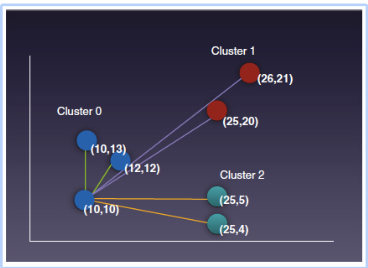

**Manually calculate its average distance to all other points in the same cluster: a**

- (10,10) – (12,12) = √8 = 2.828
- (10,10) – (10,13) = √9 = 3
- Average: (2.828 + 3.0) / 2 = 2.914

**Calculate its average distance to all points in cluster 1: a for cluster 1**

- (10,10) – (25,20) = √325 = 18.028
- (10,10) – (26,21) = √377 = 19.416
- Average: (18.028 + 19.416) / 2 = 18.722

**Calculate its average distance to all points in cluster 2: a for cluster 2**

- (10,10) – (25,5) = √250 = 15.811
- (10,10) – (25,4) = √261= 16.155
- Average: (15.811 + 16.156) / 2 = 15.983

**Use the cluster 2 since it is closer. The Silhouette Coefficient of point (10,10) is:**

- 1 – (a/b) = 1 – (2.914/15.983) = 0.817681

In [10]:
# Finding the best k using the Silhouette Coefficient
# mathematically
from sklearn import metrics
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_)
    sil.append(score)
    print(k, " ", score )

2   0.6897112069939448
3   0.5578051985195768
4   0.4430381814640289
5   0.4424248576948773
6   0.41576163256548826
7   0.3936180551723887
8   0.43678049756166826
9   0.4477506360741836
10   0.5124113408422506


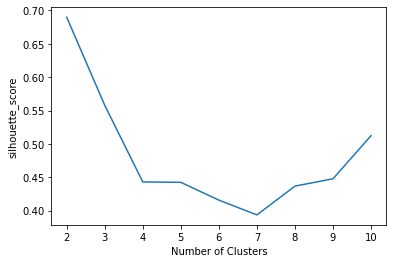

In [11]:
# Plot the Silhouette Coefficients for all k values.
# visual
plt.plot(range(2, 11), sil)
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_score")
plt.show()

#### Interpret the Results
- let's evaluate the preditions

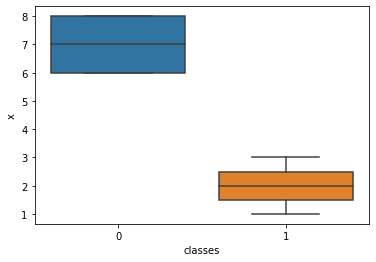

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['classes'] = kmeans.predict(X)

import seaborn as sns
sns.boxplot(x = 'classes', y = 'x', data = df)
plt.show()

# from the boxplot, we can see that cases x<3  
# are in cluster 1, and cases with x>6 are in cluster 0.